In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import f_classif, chi2
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

In [2]:
# load data
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df = df.rename(columns={
    'sepal length (cm)': 'sepal_length_cm',
    'sepal width (cm)': 'sepal_width_cm',
    'petal length (cm)': 'petal_length_cm',
    'petal width (cm)': 'petal_width_cm'
})
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## How can you check if `sepal_length_cm` is a significant feature?

### Visual Inspection

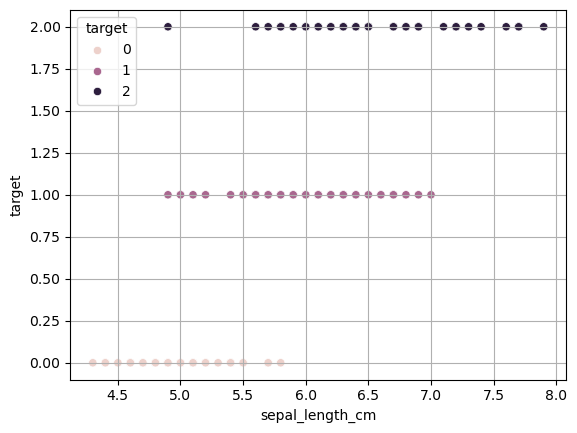

In [3]:
# plot sepal_length versus target 
sns.scatterplot(data=df, x='sepal_length_cm', y='target', hue='target')
plt.xlabel('sepal_length_cm')
plt.ylabel('target')
plt.grid(True)
plt.show()

**SCATTER PLOT INTEPRETATION** <br>
The scatter plot above shows he `sepal_length_cm` for each target class shows a tendency for lower `sepal_length_cm` to have a target class of 0, middle `sepal_length_cm` to have a target class of 1 and higher `sepal_length_cm` to have a target of 2. However, there is overlap between all three classes and so it is difficult from this plot alone to say weather or not `sepal_length_cm` is a significant feature on it's own.

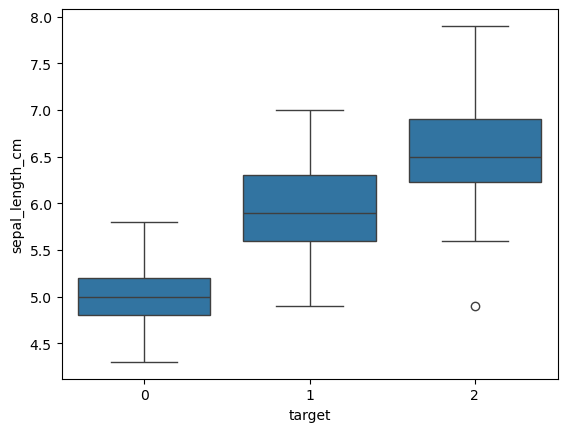

In [4]:
# boxplot
sns.boxplot(x='target', y='sepal_length_cm', data=df)
plt.xlabel('target')
plt.ylabel('sepal_length_cm')
plt.show()

**BOX PLOT INTEPRETATION** <br>
The box plot above shows the interquartile ranges for target class 0 to be distinct from target class 1 and 2, suggesting that perhaps for class 0, we can relay on `sepal_length_cm` alone as a signifcant factor. However, the interquartile ranges for class 1 and 2 overlap, which again means that from the boxplot alone to say weather or not `sepal_length_cm` is a significant feature for these two classes

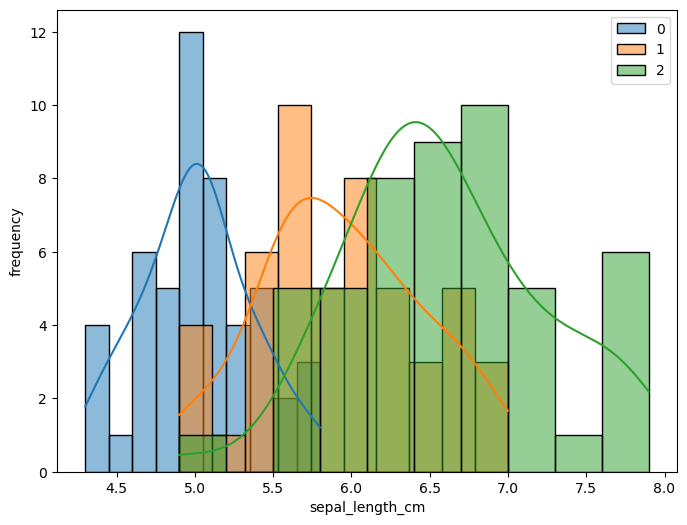

In [5]:
# histogram 
plt.figure(figsize=(8, 6))
for target in df['target'].unique():
    subset = df[df['target'] == target]
    sns.histplot(subset['sepal_length_cm'], kde=True, label=f'{target}', bins=10)
plt.xlabel('sepal_length_cm')
plt.ylabel('frequency')
plt.legend()
plt.show()

**HISTOGRAM INTEPRETATION** <br>
The histogram above shows significant overlap for class 1 and class 2 which suggest again that at least for these two target classes, `sepal_length_cm` alone is not significant. class 1 has the lest amount of overlap with class 3 suggesting a strong predictor that `sepal_length_cm` could be a significant factor at least when comparing these two. However, there is enough overlap between class 0 and class 1 to warrant further investigation

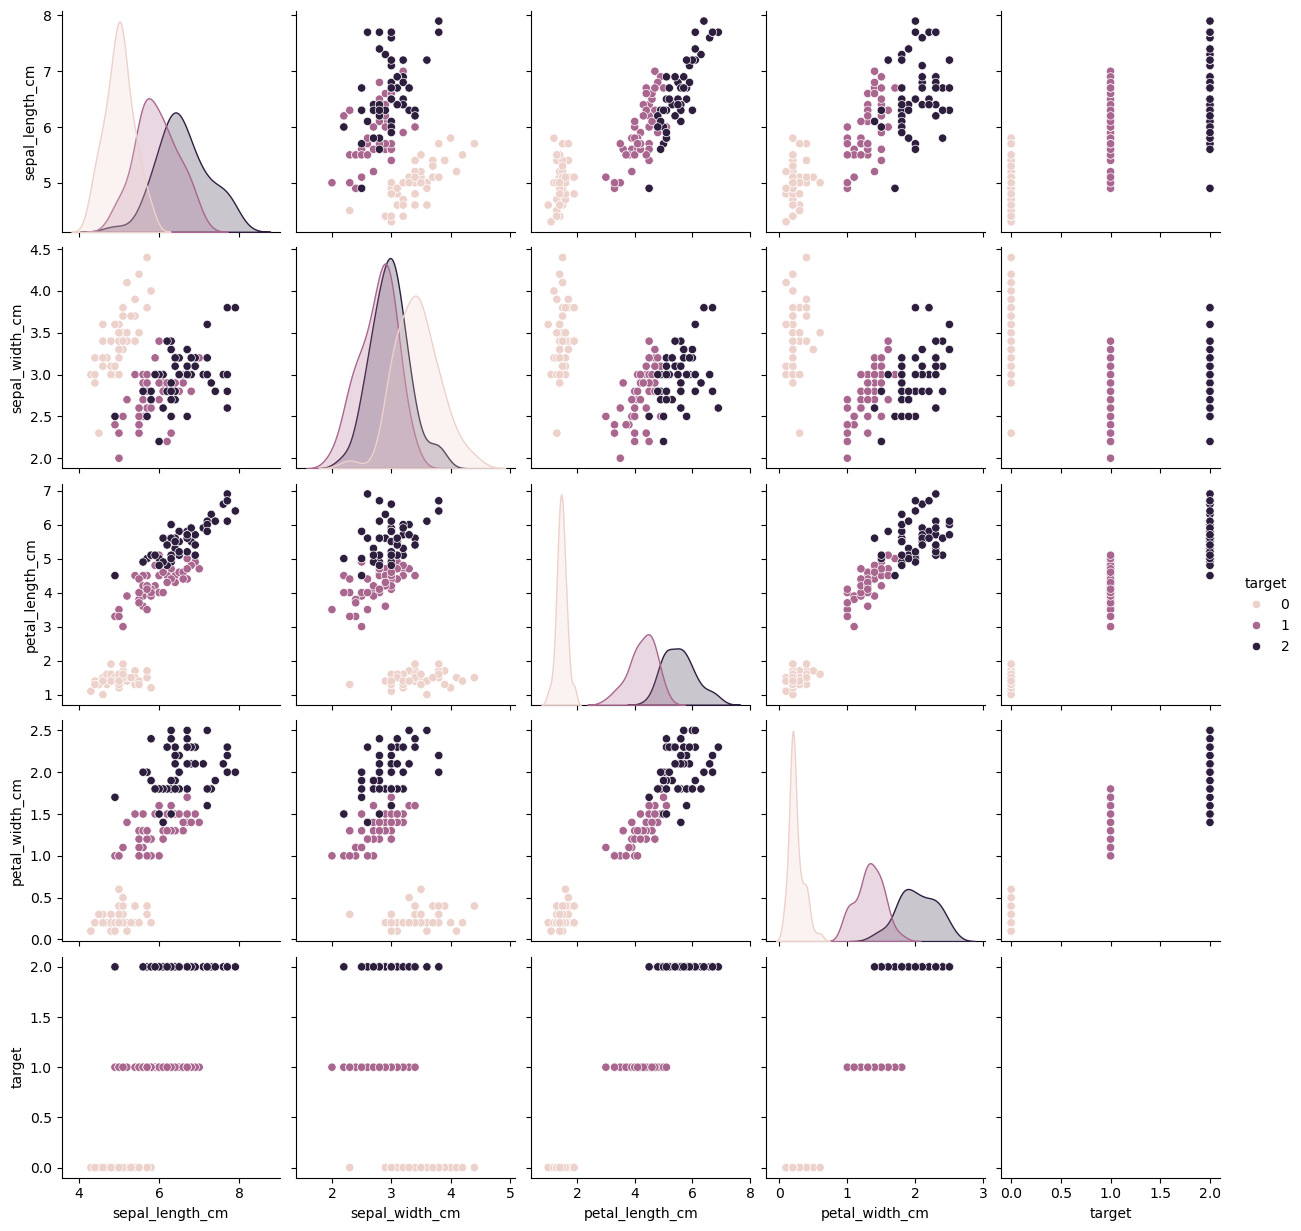

In [6]:
# pairplot
sns.pairplot(df, hue='target', vars=df.columns)
plt.show()

**PAIR PLOT INTEPRETATION** <br>
Looking at the pair plot above, specifically for class 1 and class 2, we see that there are certain pair-wise features that overlap enough to suggest the specific pair-wise combination (at least for these two classes will NOT be a significant factor). For example, the pairwise combination of sepal_width and sepal_lenght do NOT appear to a pair-wise significnat factor. 

Conversely, the other pair-wise features (e.g. petal_width/length with sepal_length/width) show little overlap (for class 1 and class 2 only) suggesting these pair-wise may be a significant factor.

## Statistial Signifigance

In [7]:
# ANOVA test
p_values = f_classif(df[['sepal_length_cm']], df['target'])
p_values[0]

array([119.26450218])

**ANOVA INTERPRETATION** <br>
We can use the p-value to determine if `sepal_length_cm` is significant. If we assume $alpha$ = 0.05, we can statistially say that `sepal_length_cm` is significant if it's p-value is less than $alpha$. In this case, our p-value is very small, at 1.66 x 10^-31 meaning we can definitavily say that `sepal_length_cm` is indeed significant. 
<br>

However, one thing to note is that p_value is extremely small in this case. While, the p-value indicates that there is a statistically significant difference in the means of sepal_length across the target classes, ANOVA assumes the target is continuous, whereas in our case it is discrete. Therefore, we should consider using other tests that are better suited for clssification 

## Chi-Square Test

In [8]:
# Chi-Square
df['sepal_length_binned'] = pd.cut(df['sepal_length_cm'], bins=3, labels=["Low", "Medium", "High"])
chi2_stat, p_val = chi2(pd.get_dummies(df['sepal_length_binned']), df['target'])
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-value: {p_val}")

Chi2 Stat: [59.52542373 27.4084507  24.7       ]
P-value: [1.18636540e-13 1.11771364e-06 4.32975327e-06]


**CHI_SQUARE INTERPRETATION** <br>
Higher values of the Chi-Square statistic indicate a greater difference between observed and expected frequencies, suggesting a stronger association.

However, one thing to note is that p_value is extremely small in this case. While, the p-value indicates that there is a statistically significant difference in the means of `sepal_length_cm` across the target classes, ANOVA assumes the target is continuous, whereas in our case it is discrete. Therefore, we should consider using other tests that are specific for classification tasks (e.g. logisitics regression)

## Logistics Regression

In [9]:
# logistic regression 
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(df[['sepal_length_cm']], df['target'])
print(f"Coefficient: {model.coef_}")

Coefficient: [[-0.86959145]
 [ 0.01223362]
 [ 0.57972675]]


/opt/anaconda3/envs/Shipt/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


**LOGISTICS REGRESSION COEFFICIENTS INTERPRETATION** <br>
Here we can see the predicitve power of how `sepal_length_cm` affects the classification of each target class. 
<br><br>
**For target = 0**, we see the coefficient is -0.87. The negative coefficeint indicates that as the feature `sepal_length_cm` increases, the probability of the corresponding class decreases. This is in line with what we see visually in the plots.
<br><br>
**For target = 1**, we see the coefficient is -0.01. When the coeffient is close to 0, such as in this case, this implies that the feature `sepal_length_cm` is not a strong differentiation for this class. Again, this is what we see visually in the plots. 
<br><br>
**For taget = 2**, we see the coefficent is 0.58. The positive coefficeint indicates that as the feature `sepal_length_cm` increases, the probability of the corresponding class increase as well. Again, this is in line with what we see visually in the plots